# **Diagnóstico de Doença Cardíaca: Comparação de Modelos SVM e Random Forest**

### Descrição das Variáveis do Dataset

- **Age:** idade do paciente *(anos)*  
- **Sex:** sexo do paciente *(M: Masculino, F: Feminino)*  
- **ChestPainType:** tipo de dor no peito  
  - **TA:** Angina Típica  
  - **ATA:** Angina Atípica  
  - **NAP:** Dor Não Anginosa  
  - **ASY:** Assintomático  
- **RestingBP:** pressão arterial em repouso *(mm Hg)*  
- **Cholesterol:** colesterol sérico *(mm/dl)*  
- **FastingBS:** glicemia em jejum  
  - **1:** se FastingBS > 120 mg/dl  
  - **0:** caso contrário  
- **RestingECG:** resultados do eletrocardiograma em repouso  
  - **Normal:** Normal  
  - **ST:** anormalidade na onda ST-T *(inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV)*  
  - **LVH:** provável ou definida hipertrofia ventricular esquerda *(critérios de Estes)*  
- **MaxHR:** frequência cardíaca máxima atingida *(valor entre 60 e 202)*  
- **ExerciseAngina:** angina induzida por exercício *(Y: Sim, N: Não)*  
- **Oldpeak:** valor de depressão do segmento ST *(numérico)*  
- **ST_Slope:** inclinação do segmento ST durante o exercício  
  - **Up:** ascendente  
  - **Flat:** plana  
  - **Down:** descendente  
- **HeartDisease:** classe de saída  
  - **1:** presença de doença cardíaca  
  - **0:** normal


## **Configuração, Carregamento e Exploração dos Dados**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    roc_auc_score
)

In [5]:
# Carregar o dataset
df = pd.read_csv('datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Mostrar a forma do DataFrame
df.shape

(918, 12)

In [7]:
# Estatísticas descritivas do DataFrame
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# Verificar quantos valores = 0 existem na coluna RestingBP
print((df['RestingBP'] == 0).sum())

1


In [9]:
# Verificar quantos valores = 0 existem na coluna Cholesterol
print((df['Cholesterol'] == 0).sum())

172


## **Tratamento de Dados**

In [10]:
# Remover linhas com 'RestingBP' igual a 0
df = df.loc[df["RestingBP"] != 0]

In [11]:
# Substituir valores 0 em 'Cholesterol' por NaN
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan
df['Cholesterol'].mean()

np.float64(244.6353887399464)

In [12]:
# Tratar valores nulos em 'Cholesterol' com a média
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

In [13]:
# Verificar valores nulos
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## **Pré-processamento (Encoding e Escalonamento)**

In [15]:
# Fazer cópia para pré-processamento
df2 = pd.DataFrame.copy(df)

# Label Encoding Manual
df2['Sex'] = df2['Sex'].replace({'M':0, 'F': 1})
df2['ChestPainType'] = df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3})
df2['RestingECG'] = df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2})
df2['ExerciseAngina'] = df2['ExerciseAngina'].replace({'N':0, 'Y': 1})
df2['ST_Slope'] = df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2})

print(df2.head())

# Definir Previsores (X) e Alvo (y)
previsores = df2.iloc[:, 0:11].values
alvo = df2.iloc[:, 11].values

# Escalonamento (Padronização)
scaler = StandardScaler()
previsores_esc = scaler.fit_transform(previsores)

print("\nDescrição dos Dados Escalonados:")
print(pd.DataFrame(previsores_esc).describe())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1        140        289.0          0           0   
1   49    1              2        160        180.0          0           0   
2   37    0              1        130        283.0          0           1   
3   48    1              3        138        214.0          0           0   
4   54    0              2        150        195.0          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  

Descrição dos Dados Escalonados:
                 0             1             2             3             4   \
count  9.170000e+02  9.170000e+02  9.170000e+02  9.170000e+02  9

/tmp/ipykernel_2216528/3061427614.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Sex'] = df2['Sex'].replace({'M':0, 'F': 1})
/tmp/ipykernel_2216528/3061427614.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['ChestPainType'] = df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3})
/tmp/ipykernel_2216528/3061427614.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

## **Divisão em Treino e Teste**

In [16]:
# Dividir em treino e teste usando os dados escalonados
X_treino, X_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

print(f"Formato X_treino: {X_treino.shape}")
print(f"Formato X_teste: {X_teste.shape}")

Formato X_treino: (641, 11)
Formato X_teste: (276, 11)


## **Modelo 1 - SVM (Treino e Avaliação)**

In [17]:
# Criar e treinar o modelo (probability=True é necessário para ROC-AUC)
svm = SVC(kernel='rbf', random_state=1, C=2, probability=True)
svm.fit(X_treino, y_treino)

# Fazer previsões
previsoes_svm = svm.predict(X_teste)

# Avaliar
print(f"Acurácia (SVM): {accuracy_score(y_teste, previsoes_svm) * 100.0:.2f}%")
print("\nMatriz de Confusão (SVM):")
print(confusion_matrix(y_teste, previsoes_svm))
print("\nRelatório de Classificação (SVM):")
print(classification_report(y_teste, previsoes_svm))

Acurácia (SVM): 85.51%

Matriz de Confusão (SVM):
[[ 97  24]
 [ 16 139]]

Relatório de Classificação (SVM):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       121
           1       0.85      0.90      0.87       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



## **Modelo 2: Random Forest**

In [18]:
# Criar e treinar o modelo
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0, max_depth=4)
random.fit(X_treino, y_treino)

# Fazer previsões
previsoes_random = random.predict(X_teste)

# Avaliar
print(f"Acurácia (Random Forest): {accuracy_score(y_teste, previsoes_random) * 100.0:.2f}%")
print("\nMatriz de Confusão (Random Forest):")
print(confusion_matrix(y_teste, previsoes_random))
print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_teste, previsoes_random))

Acurácia (Random Forest): 86.59%

Matriz de Confusão (Random Forest):
[[103  18]
 [ 19 136]]

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276




Importância das Variáveis (Random Forest)
          Variável  Importância
10        ST_Slope     0.334924
2    ChestPainType     0.162111
8   ExerciseAngina     0.131725
9          Oldpeak     0.122949
7            MaxHR     0.080308
4      Cholesterol     0.041096
0              Age     0.039118
3        RestingBP     0.028553
1              Sex     0.027140
5        FastingBS     0.022811
6       RestingECG     0.009265


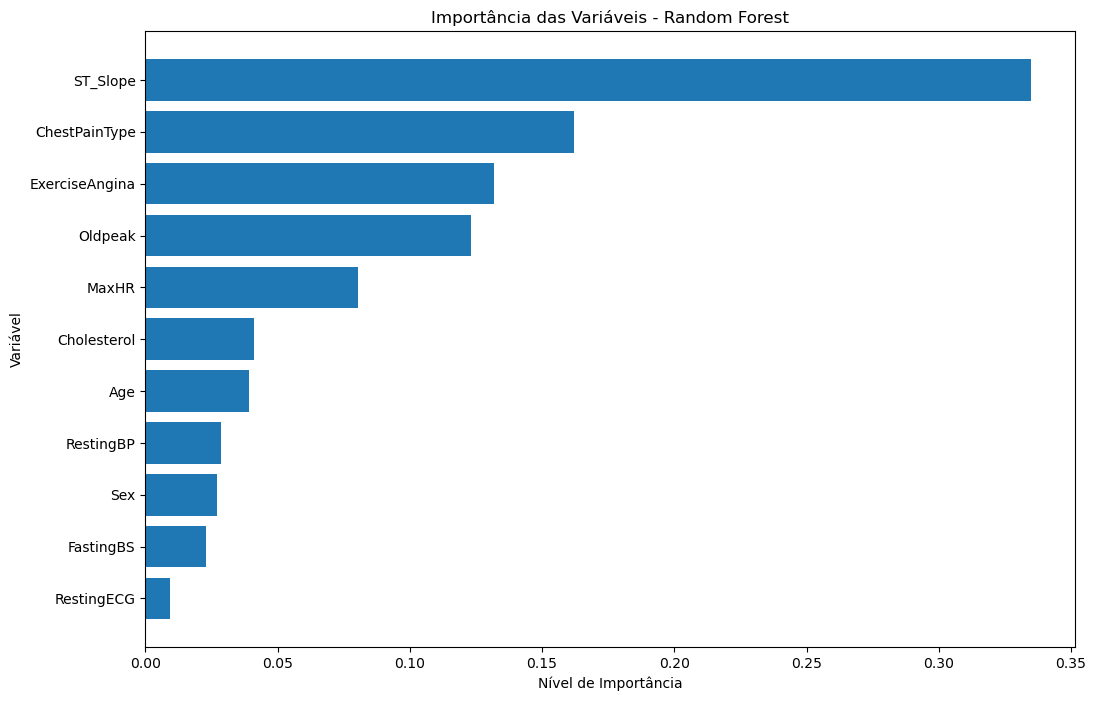

In [19]:
# Importância das Variáveis (Random Forest)
print("\nImportância das Variáveis (Random Forest)")
importancias = random.feature_importances_
nomes_colunas = df2.columns[0:11]

importancia_df = pd.DataFrame({'Variável': nomes_colunas, 'Importância': importancias})
importancia_df = importancia_df.sort_values(by='Importância', ascending=False)

print(importancia_df)

# Plotar gráfico de importância
plt.figure(figsize=(12, 8))
plt.barh(importancia_df['Variável'], importancia_df['Importância'])
plt.xlabel('Nível de Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.show()

## **Comparação de Modelos (Curva ROC-AUC)**

Score AUC (SVM): 0.9097
Score AUC (Random Forest): 0.9339


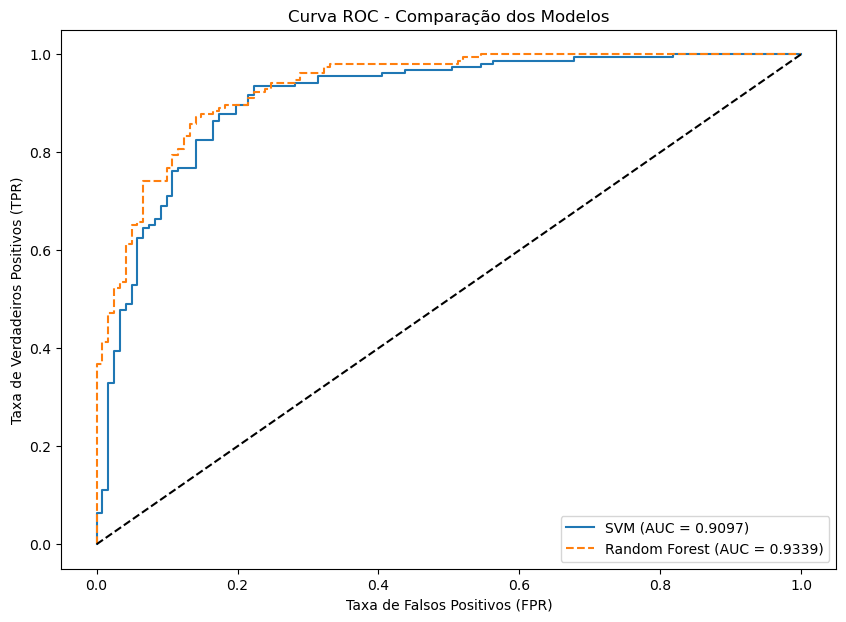

In [20]:
# Obter as probabilidades de previsão para a classe 1
prob_svm = svm.predict_proba(X_teste)[:, 1]
prob_rf = random.predict_proba(X_teste)[:, 1]

# Calcular scores AUC
auc_svm = roc_auc_score(y_teste, prob_svm)
auc_rf = roc_auc_score(y_teste, prob_rf)

print(f"Score AUC (SVM): {auc_svm:.4f}")
print(f"Score AUC (Random Forest): {auc_rf:.4f}")

# Calcular pontos da curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_teste, prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_teste, prob_rf)

# Plotar a Curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, linestyle='-', label=f'SVM (AUC = {auc_svm:.4f})')
plt.plot(fpr_rf, tpr_rf, linestyle='--', label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Linha de referência

plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Comparação dos Modelos')
plt.legend()
plt.show()

## **Conclusão**

**Qual modelo apresentou melhor desempenho?**

O Random Forest apresentou um desempenho ligeiramente superior, com Acurácia de 86.59% e AUC de 0.9339, contra 85.51% e 0.9097 do SVM.

**Quais variáveis mais impactaram a previsão?**

In [21]:
print("Com base no Random Forest, as variáveis mais importantes foram:")
print(importancia_df.head(5).to_string(index=False))

Com base no Random Forest, as variáveis mais importantes foram:
      Variável  Importância
      ST_Slope     0.334924
 ChestPainType     0.162111
ExerciseAngina     0.131725
       Oldpeak     0.122949
         MaxHR     0.080308
